In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
sample=cv2.imread('3063.jpg',0)

In [49]:
def conv_transform(image):
    image_copy=image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_copy[i][j]=image[image.shape[0]-i-1][image.shape[1]-j-1]
    return image_copy

In [50]:
def conv(image,kernel):
    kernel=conv_transform(kernel)
    image_h=image.shape[0]
    image_w=image.shape[1]
    
    kernel_h=kernel.shape[0]
    kernel_w=kernel.shape[1]
    
    h=kernel_h//2
    w=kernel_w//2
    
    image_conv=np.zeros(image.shape)
    for i in range(h,image_h-h):
        for j in range(w,image_w-w):
            sum=0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    sum=(sum + kernel[m][n]*image[i-h+m][j-w+n])
            image_conv[i][j]=sum
    return image_conv
                

In [51]:
def norm(img1,img2):
    img_copy=np.zeros(img1.shape)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            q=((img1[i][j]**2) + (img2[i][j]**2))**(1/2)
            if(q>220):  #play around with threshold to get better results
                img_copy[i][j]=255
            else:
                img_copy[i][j]=0
    return img_copy

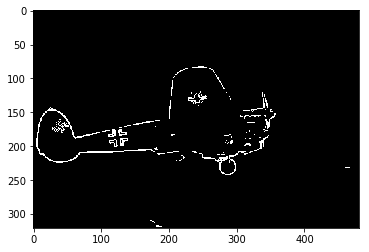

In [52]:
kernel=np.zeros(shape=(3,3))
kernel[0,0]= -1
kernel[0,1]= -2
kernel[0,2]= -1
kernel[1,0]= 0
kernel[1,1]= 0
kernel[1,2]= 0
kernel[2,0]= 1
kernel[2,1]= 2
kernel[2,2]= 1
gy=conv(sample,kernel)

kernel[0,0]= -1
kernel[0,1]= 0
kernel[0,2]= 1
kernel[1,0]= -1
kernel[1,1]= 0
kernel[1,2]= 1
kernel[2,0]= -2
kernel[2,1]= 0
kernel[2,2]= 2
gx=conv(sample,kernel)

g_sobel=norm(gx,gy)

plt.imshow(g_sobel,'gray')


In [32]:
p=cv2.imread('8068.png')
q=cv2.imread('test.png')

p=int(p)
q=int(q)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [33]:
type(p)

NoneType

In [34]:
tn=np.sum(np.logical_and(p==0,q==0))
tp=np.sum(np.logical_and(p>0,q>0))
fp=np.sum(np.logical_and(p==0,q>0))
fn=np.sum(np.logical_and(p>0,q==0))
print(fp)
print(fn)
print(tn)
print(tp)
x=tp/(tp+fn)
y=tp/(tp+fp)
print('recall: ',tp/(tp+fn))
print('precision: ',tp/(tp+fp))
print('F1: ',2*((x*y)/(x+y)))

TypeError: '>' not supported between instances of 'NoneType' and 'int'

TypeError: Image data cannot be converted to float

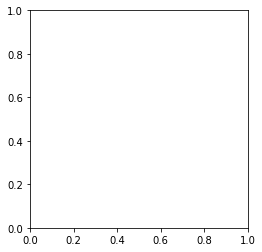

In [35]:
plt.imshow(p)

TypeError: Image data cannot be converted to float

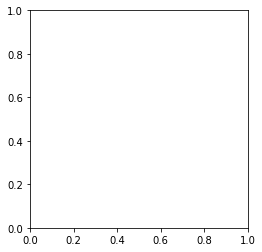

In [13]:
plt.imshow(q)

In [49]:
cv2.imwrite('test.png',g_sobel)



True